<a href="https://colab.research.google.com/github/valeriia-nekrasova/compling/blob/main/%D0%9F%D0%B5%D1%80%D0%B2%D0%B0%D1%8F%20%D0%B4%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D1%8F%D1%8F%20%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

```
Курс "Компьютерная лингвистика" | НИУ ВШЭ Санкт-Петербург
(c) В.И. Фирсанова
```

# Практика: Введение в дистрибутивную семантику и знакомство с Google Colab

## Домашнее задание

**Базовый уровень:**

* удалить стоп-слова в корпусе текстов Шескпира, лемматизировать корпус (достаточно выбрать что-то одно)
* заново обучить вектора
* найти сходства и различия между отдельными векторами
* визуализировать данные с помощью кода в заданных ячейках (можно просто перезапустить эти ячейки без изменений)
* представить выводы о проделанной работы: удалось ли вам обнаружить связи после удаления стоп-слов, лемматизации?



--2024-01-29 16:22:05--  https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1115394 (1.1M) [text/plain]
Saving to: ‘input.txt.2’

input.txt.2         100%[===================>]   1.06M  --.-KB/s    in 0.02s   

2024-01-29 16:22:05 (55.6 MB/s) - ‘input.txt.2’ saved [1115394/1115394]



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


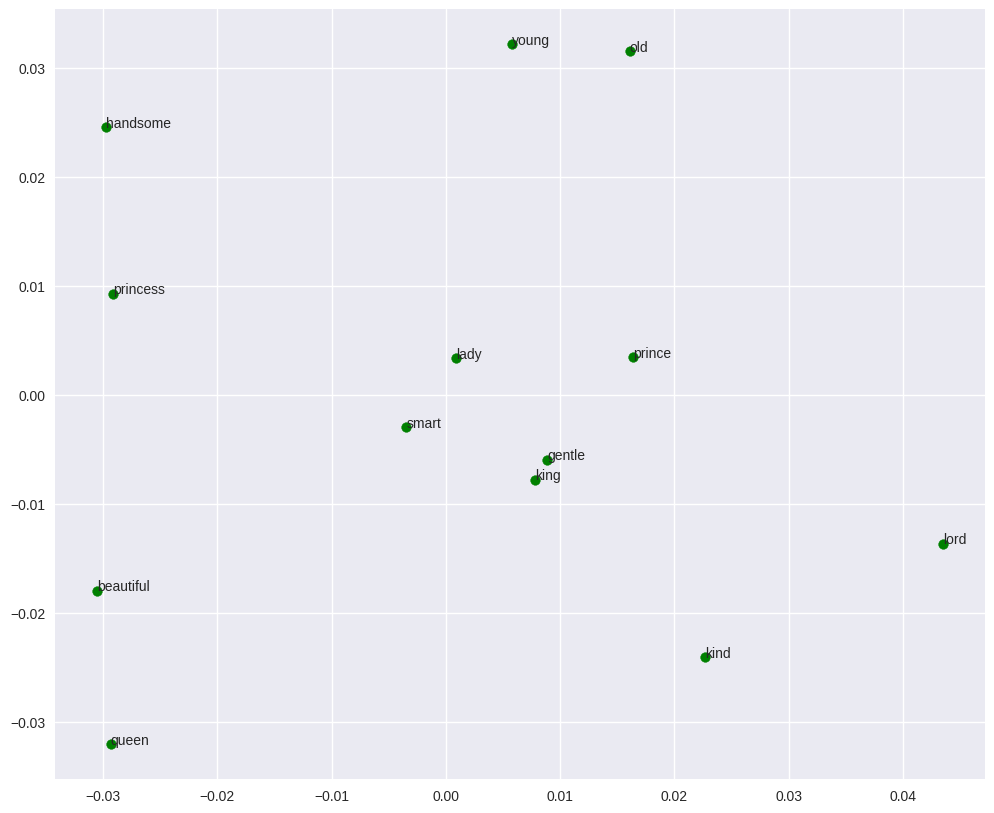

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

import re
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

!wget https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt

def clean_text(text):
    text = text.lower()             # приводим текст к нижнему регистру
    text = re.sub(r'[^a-z\s]', '', text)     # удаляем все символы кроме букв
    text = re.sub(r'\s+', ' ', text).strip() # удаляем двойные пробелы
    return text

file_path = 'input.txt'            # прописываем путь к файлу

with open(file_path, 'r') as file: # открываем файл для чтения ('r')
    text_content = file.read()     # записываем содержимое файла в переменную

cleaned_text = clean_text(text_content)

tokens = word_tokenize(cleaned_text) # токенизация

stop_words = set(stopwords.words('english')) # загружаем стоп-слова

filtered_tokens = [word for word in tokens if word.lower() not in stop_words] # удаляем стоп-слова

model1 = Word2Vec(sentences=[tokens], vector_size=100, window=5, min_count=1, workers=4) # задаем параметры исходной модели

model2 = Word2Vec(sentences=[filtered_tokens], vector_size=100, window=5, min_count=1, workers=4) # задаем параметры нашей модели


result1 = model1.wv.most_similar(["king"])
result2 = model2.wv.most_similar(["king"])

plt.style.use('seaborn-v0_8')

def pca_scatterplot(model, words=None, sample=0):
  word_vectors = [model.wv[w] for w in words]
  vectors_2d = PCA().fit_transform(word_vectors) # сократить размерность векторов до 2D

  plt.figure(figsize=(12,10)) # отрисовка изображения, задаем размер 12 на 10
  plt.scatter(vectors_2d[:,0], vectors_2d[:,1], c='g')  # задаем цвет точек и ссылаемся на данные по осям x (0) и y (1)

  for i, word in enumerate(words): # добавляем подписи к данным, проходимся по списку слов
    plt.annotate(word, (vectors_2d[i, 0], vectors_2d[i, 1])) # соотносим слово с его двухмерным вектором

pca_scatterplot(model2, ['smart', 'handsome', 'beautiful', 'kind', 'gentle', 'old', 'young',
                                'prince', 'princess', 'lady', 'king', 'queen', 'lord'])


Вывод: после удаления стоп-слов взаимное расположение выбранных слов значительно изменилось  
